In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten

from statistics import mean

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
df_train_X = pd.read_csv("DUMD_train.csv", sep=",")
df_train_y = df_train_X['UNS']
del df_train_X['UNS']

df_test_X = pd.read_csv("DUMD_test.csv", sep=",")
df_test_y = df_test_X['UNS']
del df_test_X['UNS']

# Creating X and y for Training
# Convert DataFrame into np array
X_train = np.asarray(df_train_X)
y_train = np.asarray(df_train_y)

# Creating X and y for Testing
# Convert DataFrame into np array
X_test = np.asarray(df_test_X)
y_test = np.asarray(df_test_y)

print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))
print(X_train)

323
323
80
80
[[0.   0.   0.   0.   0.  ]
 [0.08 0.08 0.1  0.24 0.9 ]
 [0.1  0.1  0.15 0.65 0.3 ]
 ...
 [0.56 0.6  0.77 0.13 0.32]
 [0.66 0.68 0.81 0.57 0.57]
 [0.68 0.64 0.79 0.97 0.24]]


In [5]:
models = []

model = keras.models.Sequential([
   Dense(5, activation='relu', input_shape=(5,)),
   Dense(4, activation='relu')
 ])
models.append(model)

model = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])
models.append(model)

model = keras.models.Sequential([
   Dense(5, activation='tanh', input_shape=(5,)),
   Dense(4, activation='tanh')
 ])
models.append(model)

print(models[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
models[0].compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
models[1].compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
models[2].compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

Test accuracy: 13.75 %


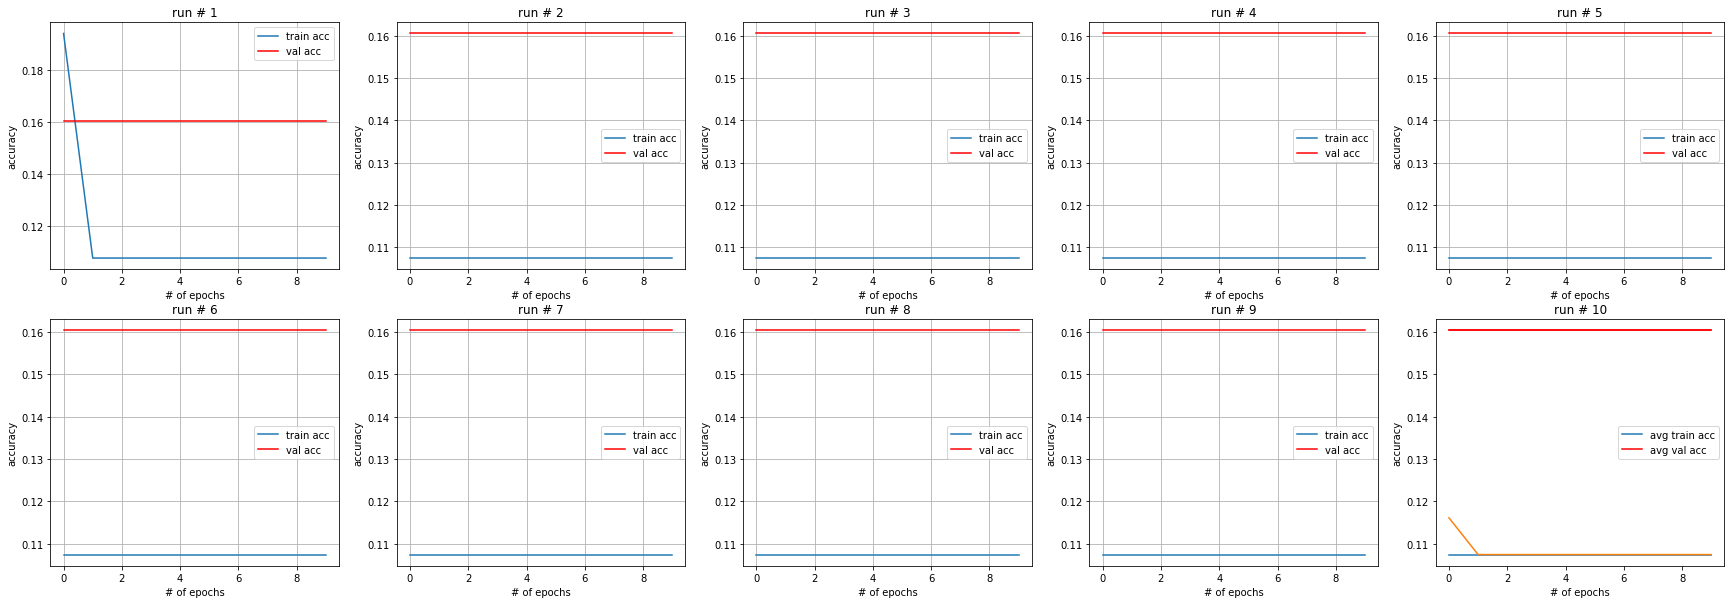

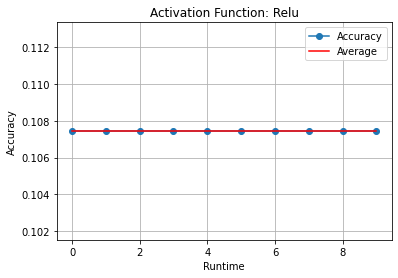

In [7]:
h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = models[0].fit(X_train, y_train, epochs=1000, batch_size=32,iter,validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(models[0].evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))
plt.show()

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,'r')
plt.legend(['Accuracy', 'Average']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Activation Function: Relu")
plt.grid()
plt.show()

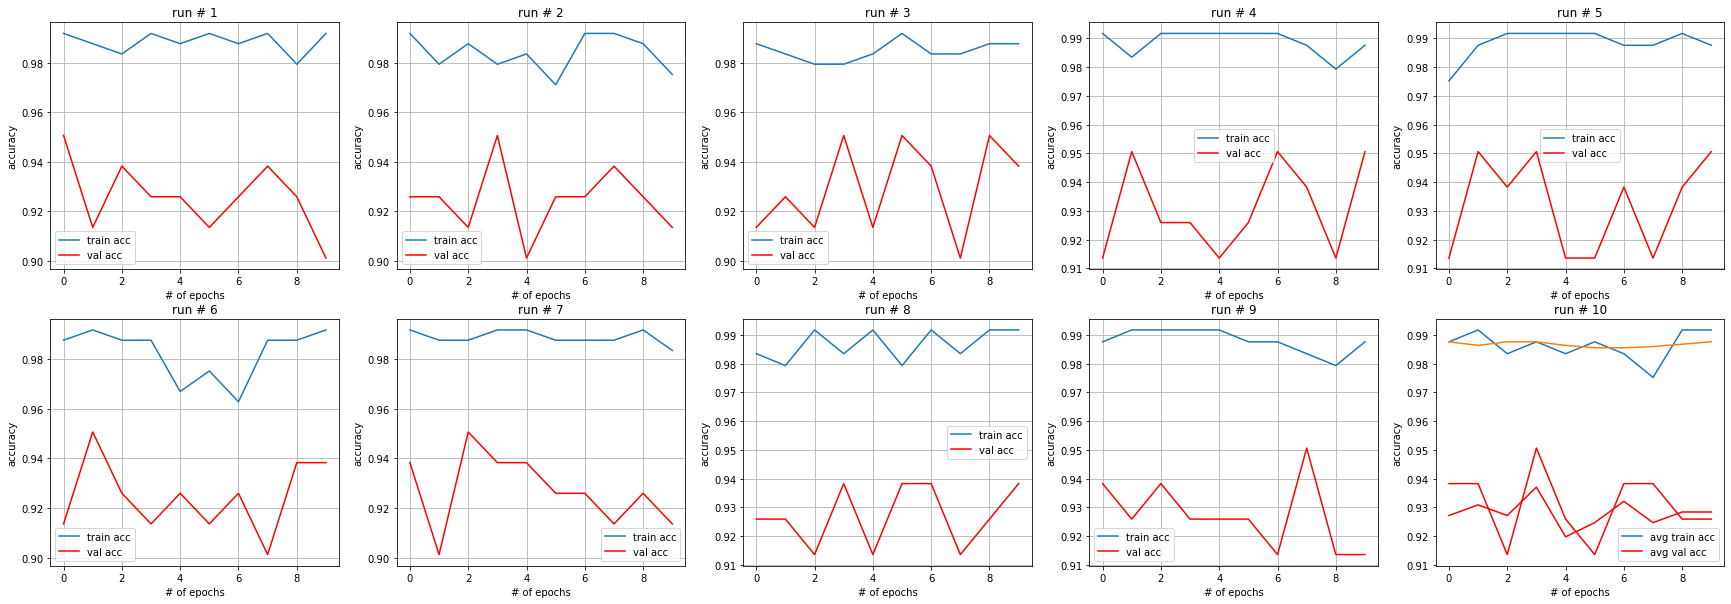

Test accuracy: 95.75 %


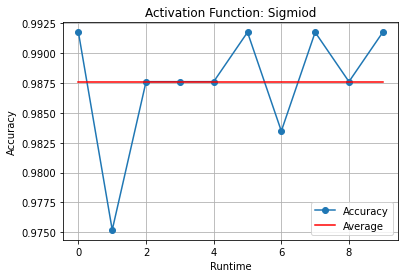

In [ ]:
h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = models[1].fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(models[1].evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,'r')
plt.legend(['Accuracy', 'Average']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Activation Function: Sigmiod")
plt.grid()
plt.show()

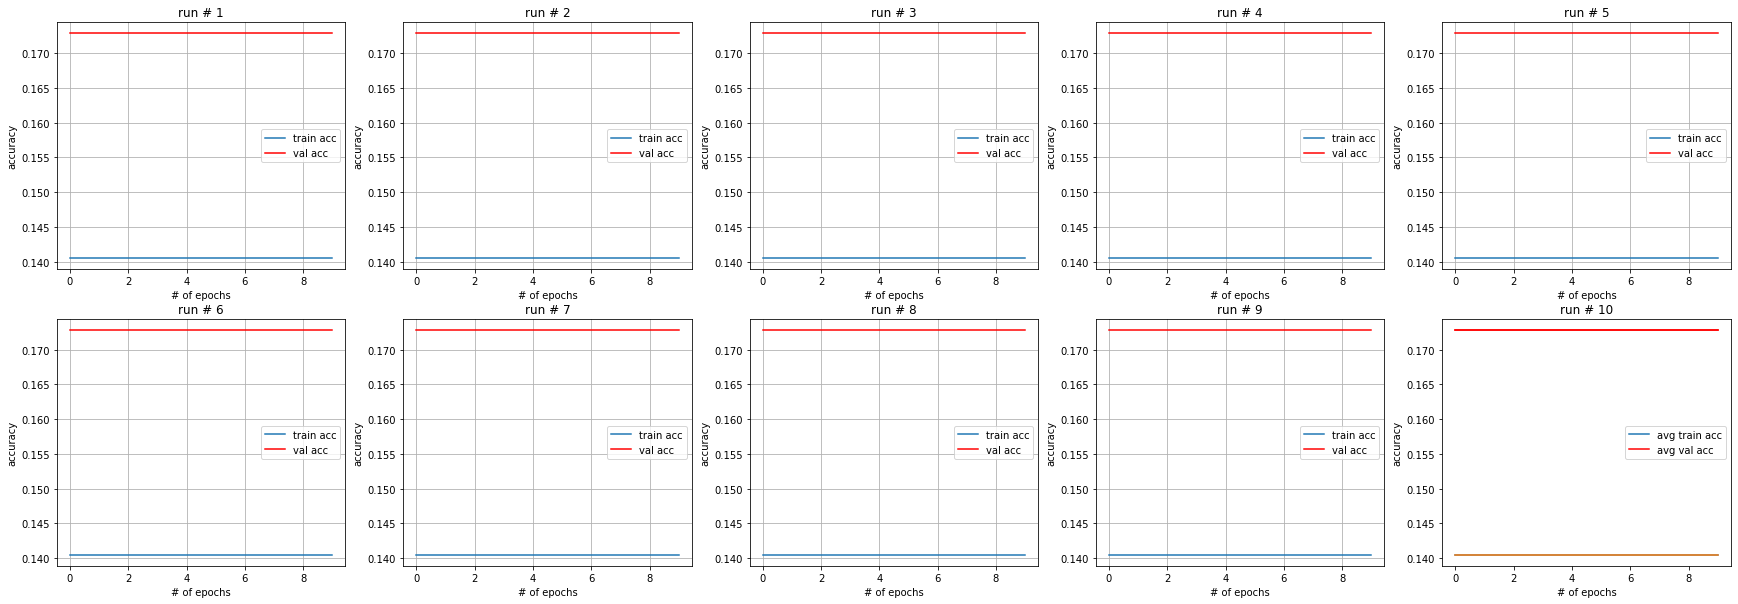

Test accuracy: 17.50 %


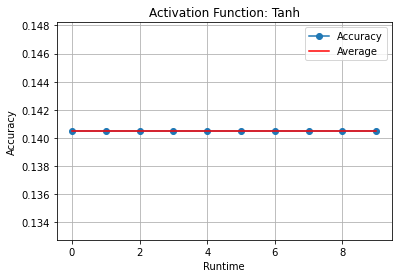

In [ ]:
h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = models[2].fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(models[2].evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,'r')
plt.legend(['Accuracy', 'Average']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Activation Function: Tanh")
plt.grid()
plt.show()

Q#2

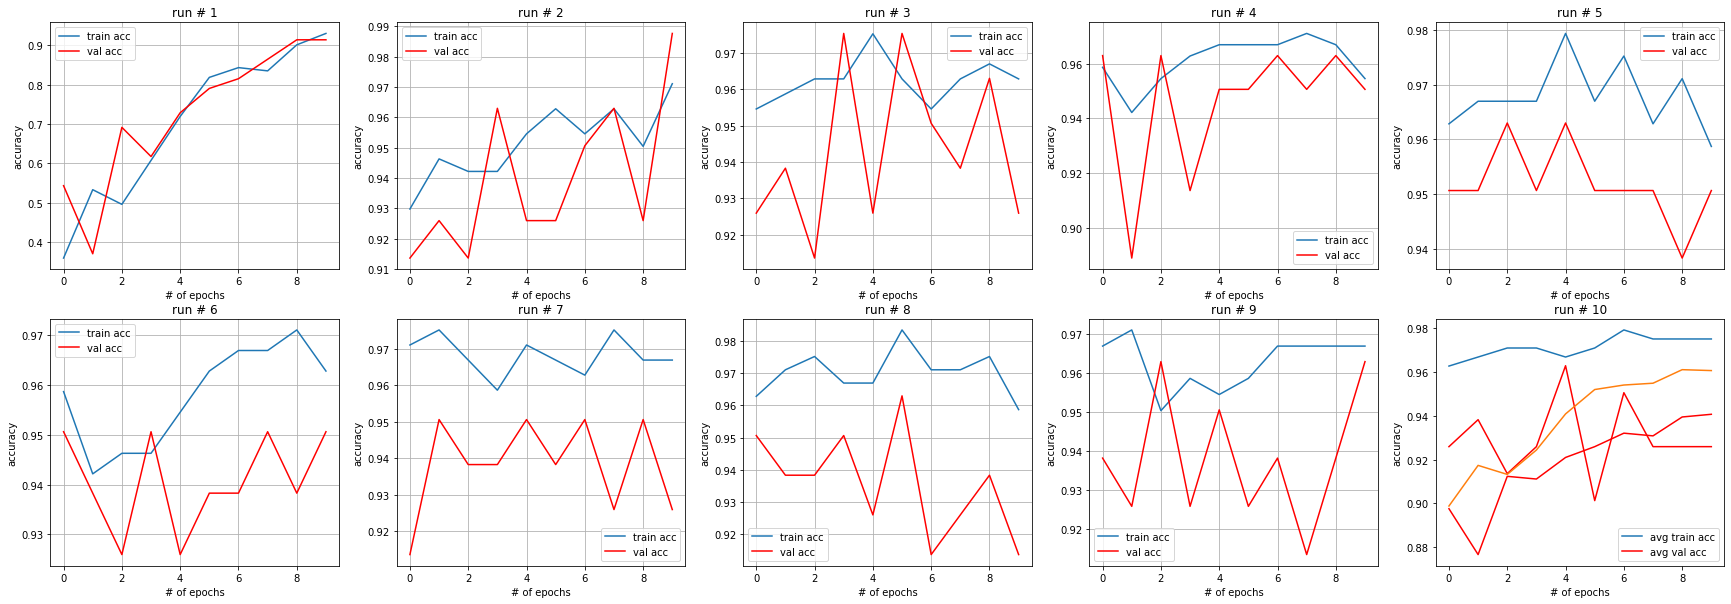

Test accuracy: 96.75 %


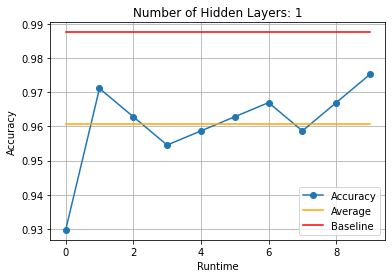

In [ ]:
# 1 Hidden layers
model_1h = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])

model_1h.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

baseline = [0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_1h.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_1h.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Number of Hidden Layers: 1")
plt.grid()
plt.show()

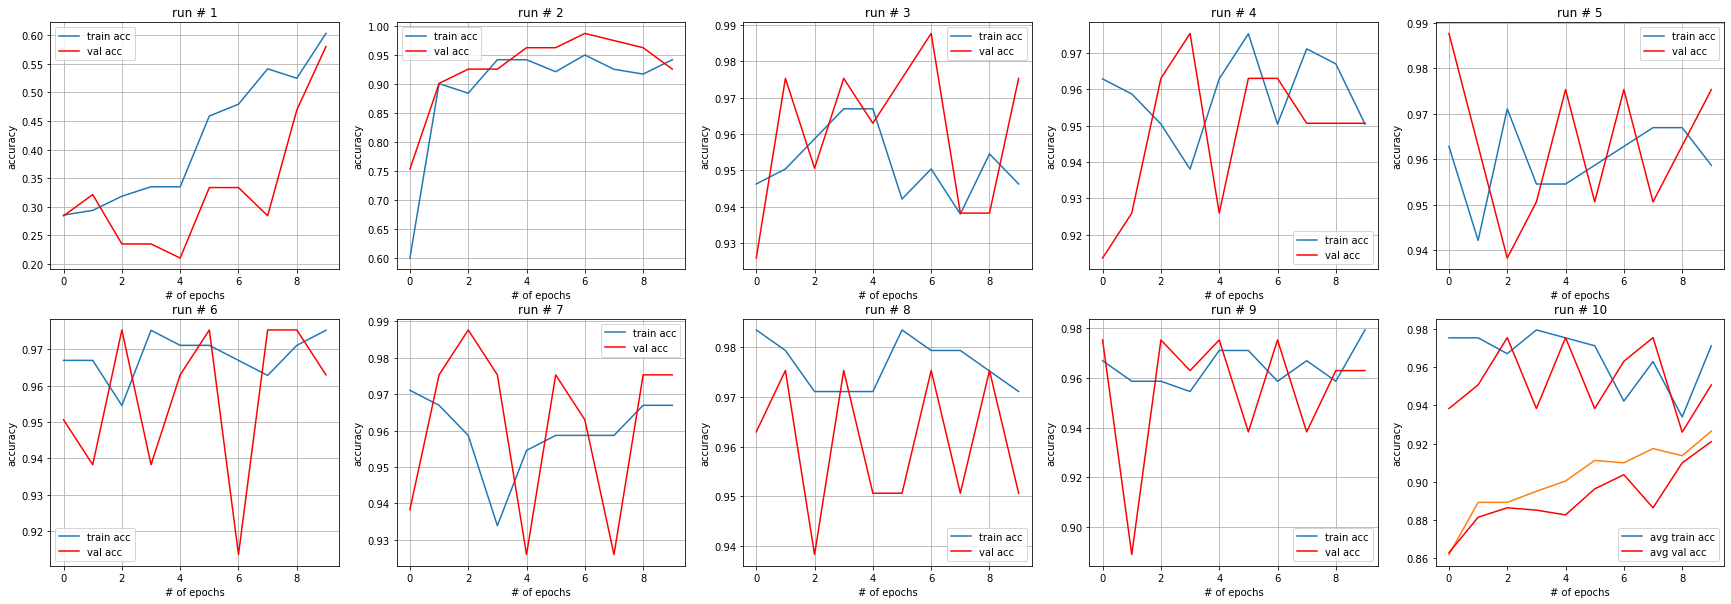

Test accuracy: 92.63 %


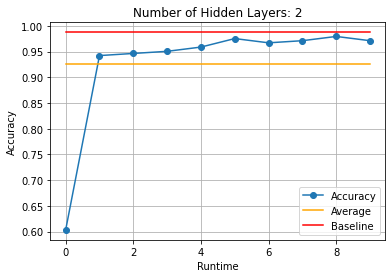

In [ ]:
# 2 Hidden layers
model_2h = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(5, activation='sigmoid'),
   Dense(4, activation='sigmoid')
 ])

model_2h.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

baseline = [0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_2h.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_2h.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Number of Hidden Layers: 2")
plt.grid()
plt.show()

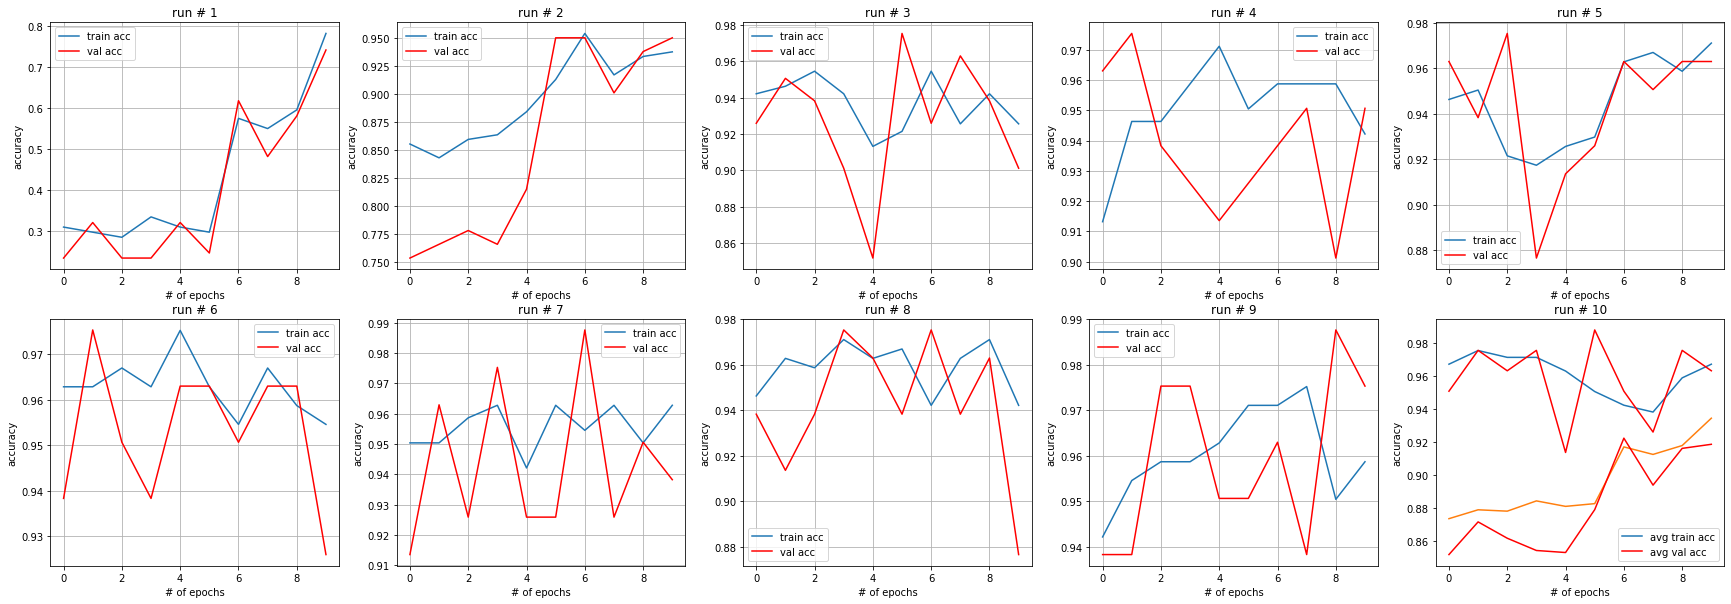

Test accuracy: 94.00 %


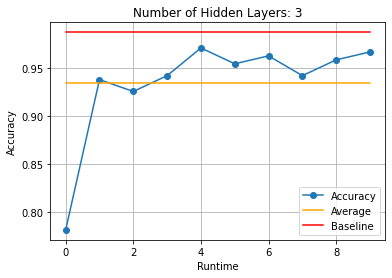

In [ ]:
# 3 Hidden layers
model_3h = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(5, activation='sigmoid'),
   Dense(5, activation='sigmoid'),
   Dense(4, activation='sigmoid')
 ])

model_3h.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

baseline = [0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_3h.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_3h.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Number of Hidden Layers: 3")
plt.grid()
plt.show()

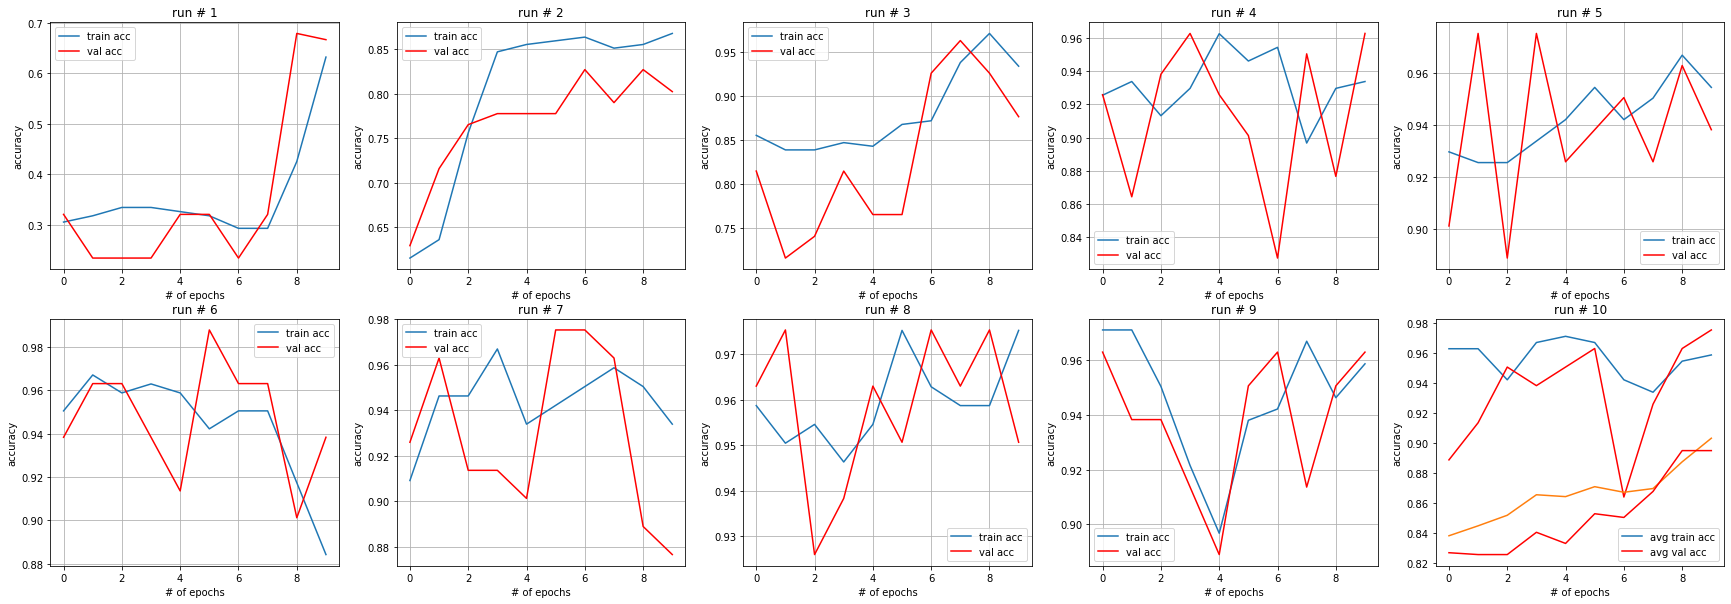

Test accuracy: 91.13 %


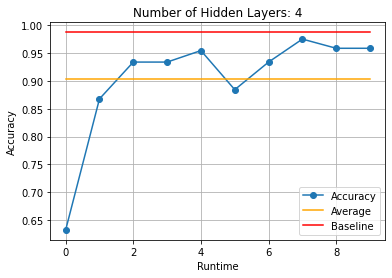

In [ ]:
# 4 Hidden layers
model_4h = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(5, activation='sigmoid'),
   Dense(5, activation='sigmoid'),
   Dense(5, activation='sigmoid'),
   Dense(4, activation='sigmoid')
 ])

model_4h.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

baseline = [0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_4h.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_4h.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Number of Hidden Layers: 4")
plt.grid()
plt.show()

Q#3

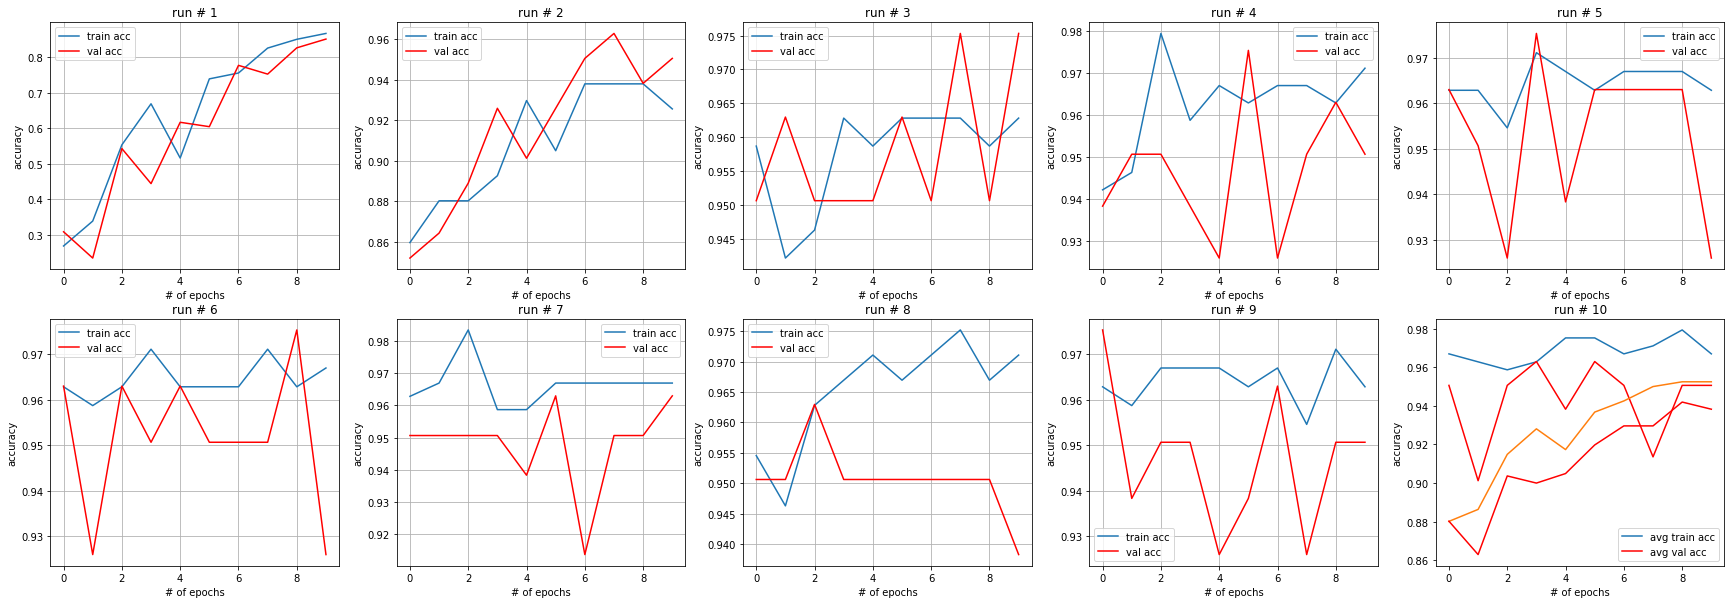

Test accuracy: 95.88 %


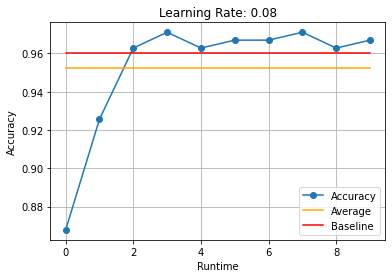

In [ ]:
# 0.08 Learning Rate
model_lr_1 = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])

model_lr_1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.08), metrics=['accuracy'])

baseline = [0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_lr_1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_lr_1.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Learning Rate: 0.08")
plt.grid()
plt.show()

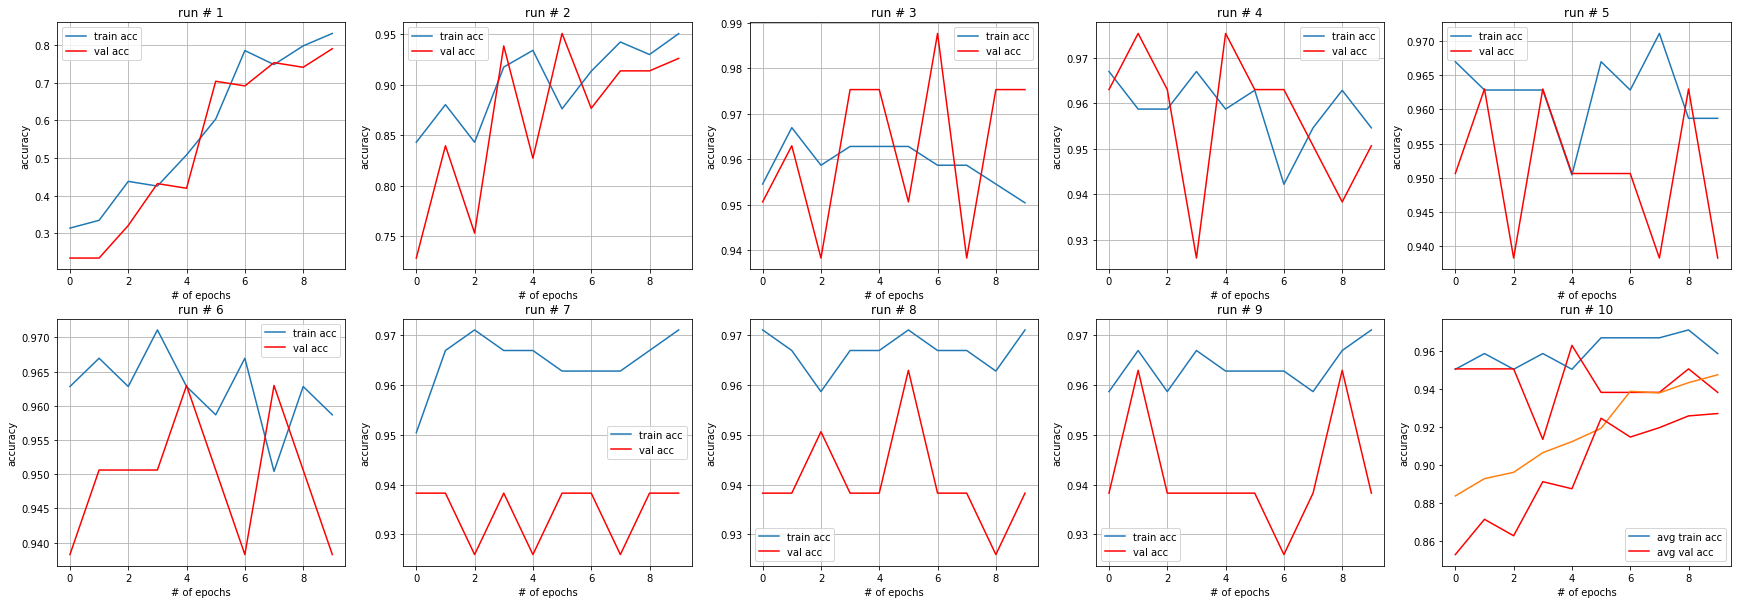

Test accuracy: 94.63 %


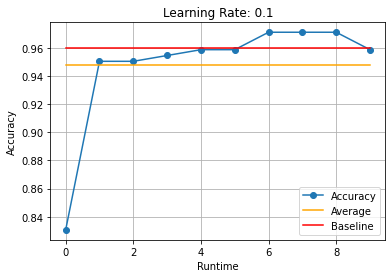

In [ ]:
# 0.1 Learning Rate
model_lr_2 = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])

model_lr_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

baseline = [0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_lr_2.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_lr_2.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Learning Rate: 0.1")
plt.grid()
plt.show()

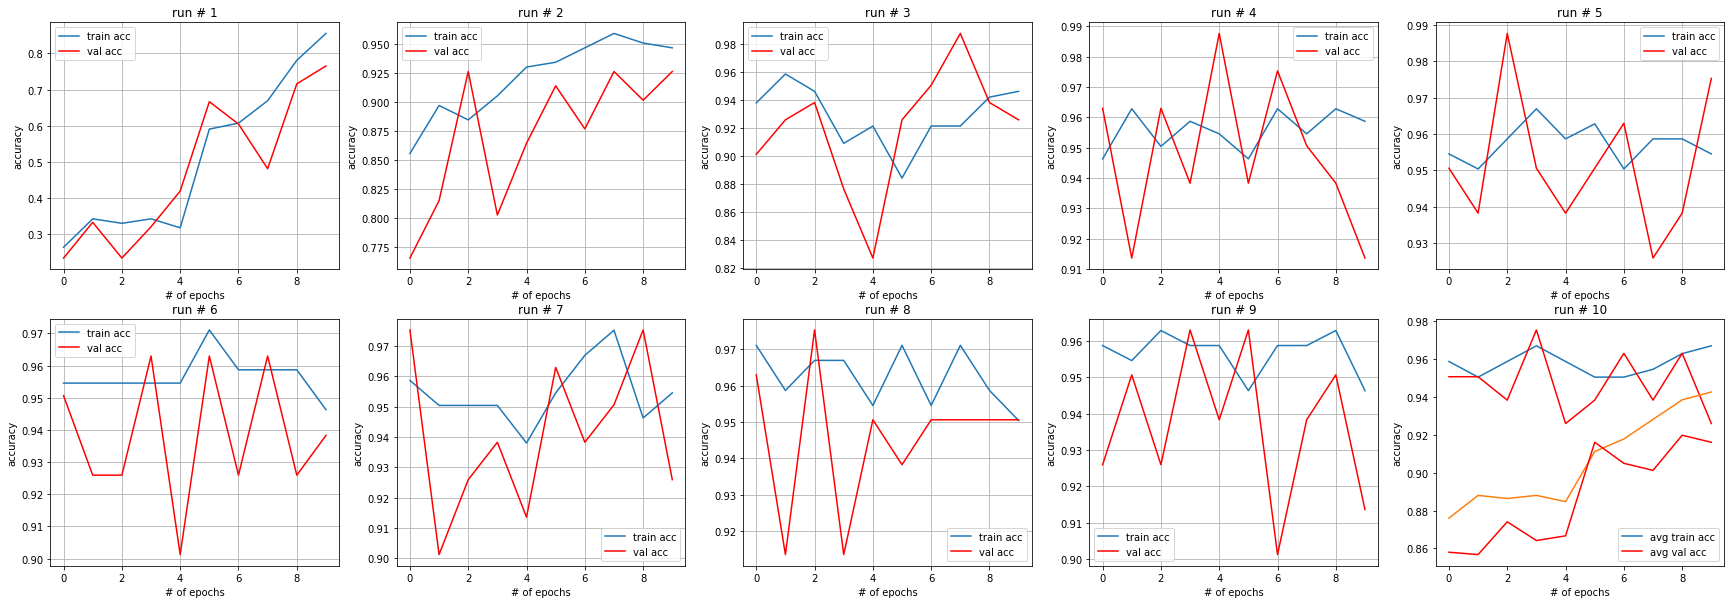

Test accuracy: 96.13 %


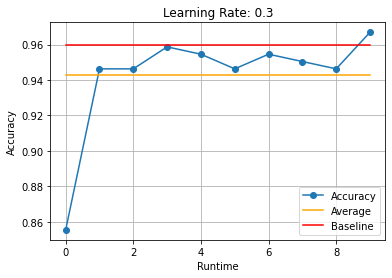

In [ ]:
# 0.3 Learning Rate
model_lr_3 = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])

model_lr_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.3), metrics=['accuracy'])

baseline = [0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = model_lr_3.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(model_lr_3.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')
plt.plot(range(0,10),baseline,'r')
plt.legend(['Accuracy', 'Average', 'Baseline']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Learning Rate: 0.3")
plt.grid()
plt.show()

Final Paramters:

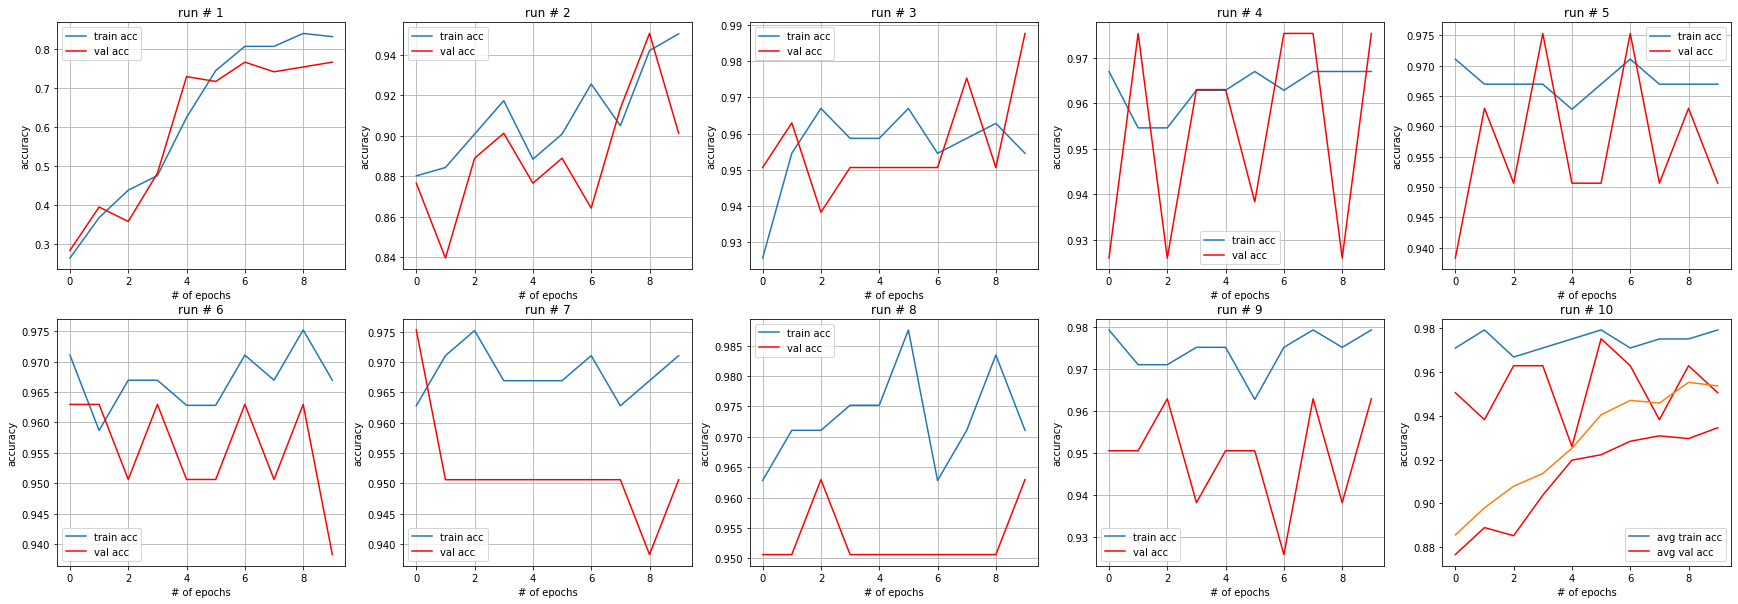

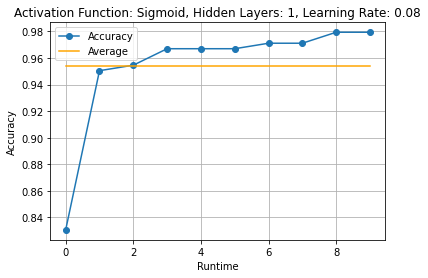

Test accuracy: 95.00 %
[[10  1  0  0]
 [ 0 25  1  0]
 [ 0  0 22  0]
 [ 0  0  0 21]]


In [ ]:
# 0.08 Learning Rate
# 1 Hidden Layer
# Sigmoid Activation Function

best_model = keras.models.Sequential([
   Dense(5, activation='sigmoid', input_shape=(5,)),
   Dense(4, activation='sigmoid')
 ])

best_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.08), metrics=['accuracy'])

h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  h = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.25, verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(best_model.evaluate(X_test,y_test, verbose=0)[1])

for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train, marker='o')
plt.plot(range(0,10),[h_avg_train[-1]]*10,color='orange')

plt.legend(['Accuracy', 'Average']) 
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.title("Activation Function: Sigmoid, Hidden Layers: 1, Learning Rate: 0.08")
plt.grid()
plt.show()

print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

y_pred = np.argmax(best_model.predict(X_test),axis=1)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)